In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# Set seed for reproducibility
np.random.seed(1)

# Define dataset parameters
num_samples = 1000
num_features = 20
outlier_fraction = 0.01
num_outliers = int(num_samples * outlier_fraction)
num_inliers = num_samples - num_outliers

# Generate inliers (99% of data)
inliers = np.random.normal(loc=1, scale=0.01, size=(num_inliers, num_features))

# Generate outliers (1% of data)
outliers = np.random.normal(loc=1, scale=0.01, size=(num_outliers, num_features))
outliers[:, :5] = np.random.normal(loc=0, scale=0.01, size=(num_outliers, 5))  # First 5 features differ

# Combine datasets
X = np.vstack((inliers, outliers))

# Create DataFrame
columns = [f'feature_{i+1}' for i in range(num_features)]
df = pd.DataFrame(X, columns=columns)


In [3]:
X_scaled = df.values

In [4]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_scaled)

In [5]:
X_scaled

array([[ 1.01624345e+00,  9.93882436e-01,  9.94718282e-01, ...,
         9.91221416e-01,  1.00042214e+00,  1.00582815e+00],
       [ 9.88993808e-01,  1.01144724e+00,  1.00901591e+00, ...,
         1.00234416e+00,  1.01659802e+00,  1.00742044e+00],
       [ 9.98081644e-01,  9.91123710e-01,  9.92528417e-01, ...,
         1.00931102e+00,  1.00285587e+00,  1.00885141e+00],
       ...,
       [-1.00790645e-02,  4.03338805e-03,  6.98033588e-03, ...,
         9.87595409e-01,  9.95159758e-01,  9.82296787e-01],
       [ 1.28367008e-02,  4.72249725e-03,  2.15143986e-05, ...,
         9.90790903e-01,  1.00451976e+00,  9.96805687e-01],
       [ 2.04480984e-03, -1.89071823e-02, -3.44942192e-03, ...,
         1.02408434e+00,  1.00882786e+00,  9.99004037e-01]])

In [6]:
from src.ocsvm.OneClassSVMClassifier import OneClassSVMClassifier
classifier = OneClassSVMClassifier(X_scaled, nu=0.1)

In [7]:
decision, y_pred = classifier.fit()

[[1.         0.36602079 0.35818982 ... 0.         0.         0.        ]
 [0.36602079 1.         0.49279994 ... 0.         0.         0.        ]
 [0.35818982 0.49279994 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.38436636 0.19751819]
 [0.         0.         0.         ... 0.38436636 1.         0.21894989]
 [0.         0.         0.         ... 0.19751819 0.21894989 1.        ]]
[0.99999983 0.33010714 0.99999993 0.95486925 0.9999999  0.78065278
 0.99999985 0.99999998 0.69285445 0.99999986 0.99994719 0.99999977
 0.99999993 0.33201055 0.99999901 0.99999998 0.99999988 0.99999996
 0.72896469 0.99999995 0.99999995 0.94726061 0.99999996 0.99999988
 0.99999998 0.99999998 0.9999999  0.99999998 0.22251865 0.99999993
 0.99999997 0.99999994 0.99999769 0.46704461 0.99999997 0.79366259
 0.99999994 0.99999999 0.99999997 0.99999997 0.99999996 0.99999997
 0.99999993 0.99999989 0.99999993 0.99999949 0.99999071 0.30521852
 0.9999998  0.999999

In [8]:
counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 898, 'percentage': 89.8}, -1: {'count': 102, 'percentage': 10.2}}


In [9]:
classifier.model.gamma

257.1150435230413

In [10]:
decision

array([ 1.90545927e+00,  7.71200357e+00,  9.34625231e+00,  3.73526262e+00,
        1.40639567e+01,  7.24459810e+00,  3.82035745e+00,  6.19085996e+00,
        3.65124344e+00,  6.44304318e+00,  2.77567190e-01,  1.83771809e+00,
        9.37891423e-01,  6.65786688e+00,  1.41362435e+01,  3.66626886e-01,
       -4.84685042e-01,  1.20209021e+01,  1.82707696e-05,  4.28905051e+00,
       -1.58248921e+00,  5.30735065e+00,  7.07228035e+00,  5.50645578e+00,
        3.60636369e+00,  8.80025126e+00,  5.13111875e+00,  1.84456048e+00,
        8.94015030e-05,  3.12258563e+00,  4.59489115e+00,  9.21977929e+00,
        3.29578189e+00,  5.77013270e+00,  4.68789288e+00,  4.44281244e+00,
       -1.04026731e+00,  9.17950584e+00,  2.02740291e+00,  5.29099038e+00,
        5.34342366e+00,  1.45302974e+01,  1.90020891e+00,  6.72027765e+00,
        1.65470122e+00,  7.09362060e+00,  7.13160107e+00,  7.61008498e+00,
        3.17893208e+00,  1.04640055e+01, -2.12538727e-06,  5.00192678e+00,
        1.64698185e+00,  

In [11]:
indices = [i for i, value in enumerate(y_pred) if value == -1]
print(indices)

[16, 20, 36, 50, 69, 73, 79, 83, 84, 85, 111, 119, 136, 141, 162, 171, 175, 193, 195, 197, 205, 211, 215, 220, 228, 262, 271, 277, 295, 316, 325, 332, 351, 355, 356, 363, 368, 400, 408, 410, 415, 420, 427, 430, 431, 434, 477, 496, 523, 553, 555, 572, 582, 584, 585, 597, 606, 612, 620, 645, 646, 651, 657, 663, 680, 694, 703, 710, 711, 715, 716, 731, 746, 747, 763, 770, 771, 774, 822, 842, 853, 857, 865, 871, 889, 893, 927, 948, 958, 964, 974, 981, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]


In [12]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(gamma=classifier.model.gamma, nu=0.1)

In [13]:
clf.fit(X_scaled)

OneClassSVM(gamma=257.1150435230413, nu=0.1)

In [14]:
y_pred = clf.predict(X_scaled)

In [15]:
counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 903, 'percentage': 90.3}, -1: {'count': 97, 'percentage': 9.700000000000001}}


In [16]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1

In [17]:
import shap
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(X_scaled, 100))

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [18]:
shap_values = explainer.shap_values(X_scaled, nsamples = 100)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [05:32<00:00,  3.01it/s]


In [19]:
# shap_values_1 = explainer(X_scaled)

In [20]:
shap_subset = shap_values[-10:]  # shape: (n_subset, n_features)
X_subset = X_scaled[-10:]

In [21]:
from src.utils.visualisation.deterministic_values import global_bar_plot, local_bar_plot
mean_abs_shap_values = np.abs(X_subset).mean(axis=0) 


In [22]:
mean_abs_shap_values

array([0.00923419, 0.00658402, 0.00571146, 0.00929199, 0.01090357,
       0.99817475, 1.00544567, 1.0030147 , 1.002994  , 0.99935296,
       1.00063921, 0.99761129, 0.99472046, 1.00343721, 0.99538391,
       0.99963943, 0.99940845, 1.00111919, 1.00159073, 1.00029588])

In [23]:
# local_bar_plot(shap_values, 99, feature_names = columns)

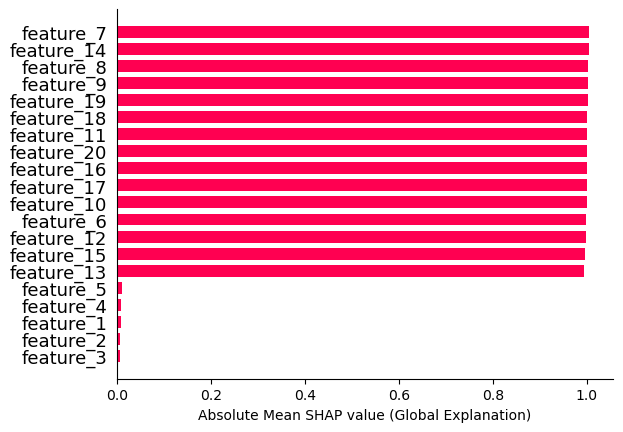

: 

In [ ]:
global_bar_plot(mean_abs_shap_values, feature_names=columns)

In [ ]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=X_scaled, classifier=classifier)
ocsvm_shap.fit_ocsvmshap(X=X_scaled, num_coalitions=100)

100%|██████████| 101/101 [08:37<00:00,  5.12s/it]


In [ ]:
from src.utils.visualisation.deterministic_values import global_bar_plot, local_bar_plot
shapley_values = ocsvm_shap.return_deterministic_shapley_values()

The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3618.)


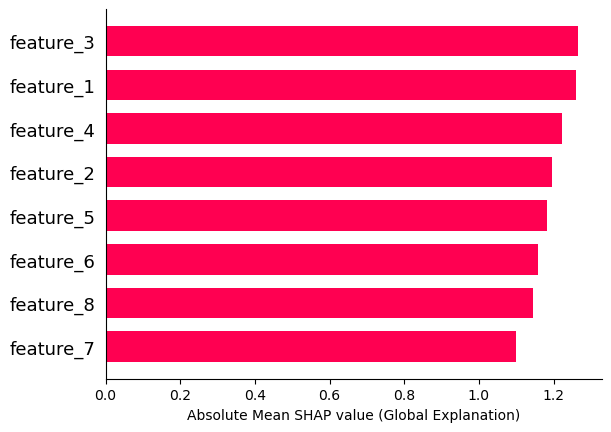

In [ ]:
# global importance measure
mean_abs_shap_values_rkhs = np.abs(shapley_values.T).mean(axis=0)  # (num_features,)

# Call bar_plot for global explanation
global_bar_plot(mean_abs_shap_values_rkhs.T, feature_names=columns)